In [36]:
#Importing most of the libraries we have used in our assignments that we will use in this project

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("./data.csv")
df[0::10]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
10,0,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
20,0,0.485253,0.545573,0.534665,0.622177,0.622256,0.999065,0.797522,0.809406,0.303554,...,0.804639,0.014039,0.623922,0.622177,0.840639,0.277988,0.026794,0.565171,1,0.039507
30,1,0.462195,0.536034,0.514428,0.599987,0.599987,0.998909,0.797291,0.809223,0.303477,...,0.787082,0.001631,0.621876,0.599984,0.838259,0.297038,0.024886,0.576473,1,0.014562
40,0,0.507824,0.571631,0.549226,0.625326,0.625326,0.999136,0.797542,0.809413,0.303442,...,0.815731,0.007173,0.623729,0.625327,0.841574,0.279236,0.026908,0.565659,1,0.031485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,0,0.435967,0.498692,0.486054,0.603626,0.603626,0.998893,0.797239,0.809179,0.303421,...,0.773759,0.001563,0.623994,0.603624,0.838736,0.276539,0.026787,0.565138,1,0.062338
6780,0,0.520402,0.586295,0.567910,0.610545,0.610343,0.999095,0.797565,0.809454,0.303567,...,0.827839,0.003365,0.624445,0.610541,0.841969,0.276784,0.026791,0.565160,1,0.056275
6790,0,0.474333,0.530637,0.524653,0.599281,0.599353,0.998958,0.797356,0.809287,0.303489,...,0.791776,0.000581,0.622525,0.599277,0.839482,0.287351,0.025696,0.707735,1,0.017872
6800,0,0.438210,0.493295,0.484769,0.619762,0.619784,0.998926,0.797223,0.809153,0.303323,...,0.772423,0.000526,0.623801,0.619757,0.838684,0.276378,0.026774,0.565077,1,0.067287


# Data Analysis

# Check if our data has duplicate data

In [38]:
df.duplicated(keep=False).sum()

0

# Check if our data has any null values

In [39]:
df.isnull().values.sum()

0

# The data consist of only int64 and float64 data types

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [41]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [42]:
#feature columns
X = df.drop('Bankrupt?', axis=1)

#label column
y = df['Bankrupt?']

# The data is imbalanced and needs to balanced

0    6599
1     220
Name: Bankrupt?, dtype: int64


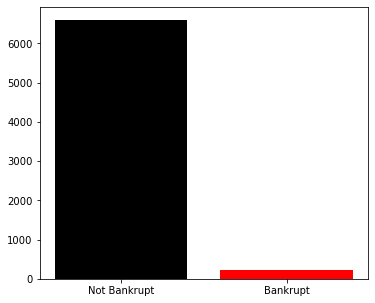

In [43]:
#we have inbalanced data
print(df['Bankrupt?'].value_counts())

no = df['Bankrupt?'].value_counts()[0]
yes = df['Bankrupt?'].value_counts()[1]


names = ['Not Bankrupt','Bankrupt']
values = [no,yes]
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values, color=['black','red'])
plt.show()

# We use SMOTE(Synthetic Minority Oversampling Technique) to correct the imbalance of our data.

In [44]:
#pip install -U imbalanced-learn

# transform the dataset using smote oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

1    6599
0    6599
Name: Bankrupt?, dtype: int64


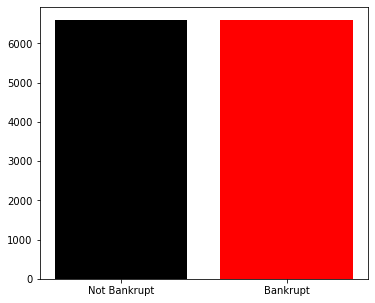

In [45]:
print(y.value_counts())

yes = y.value_counts()[0]
no = y.value_counts()[1]


names = ['Not Bankrupt','Bankrupt']
values = [no,yes]
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values, color=['black','red'])
plt.show()

# Split our data into training and testing variables

In [46]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(9238, 95)
(9238,)
(3960, 95)
(3960,)


# KNN

In [47]:
# Instantiating another "object" of KNeighborsClassifier "class" with k=3:
k = 3
bankrupt_knn = KNeighborsClassifier(n_neighbors=k)

# Training ONLY on the training set:
bankrupt_knn.fit(X_train, y_train)

# Testing on the testing set:
y_predict_knn = bankrupt_knn.predict(X_test)

In [48]:
# Accuracy Evaluation
accuracy_knn = accuracy_score(y_test, y_predict_knn)
print(accuracy_knn)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_knn = bankrupt_knn.predict_proba(X_test)

0.9227272727272727


In [49]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_knn)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_knn)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_knn[:,1])

6103     0
8930     1
495      0
4814     0
4060     0
        ..
5533     0
1599     0
12951    1
3345     0
12439    1
Name: Bankrupt?, Length: 3960, dtype: int64
[0 1 0 ... 1 0 1]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
[0. 1. 0. ... 1. 0. 1.]


In [107]:
fpr_KNN, tpr_KNN, thresholds_KNN = metrics.roc_curve(y_test, y_predict_prob_knn[:,1], pos_label=1)

print(fpr_KNN)
print(tpr_KNN)

# AUC:
AUC = metrics.auc(fpr_KNN, tpr_KNN)
print(AUC)

[0.         0.07053527 0.14457229 0.2046023  1.        ]
[0.         0.9372769  0.99133095 0.99847017 1.        ]
0.958962908277188


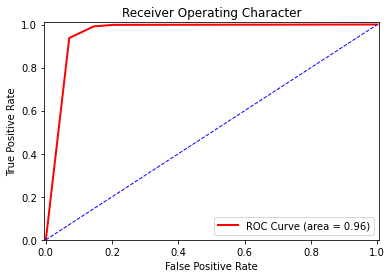

In [108]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_KNN, tpr_KNN, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Character')
plt.legend(loc="lower right")

plt.show()

# Logistic Regression Classifier:

In [52]:
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 

bankrupt_logreg = LogisticRegression(max_iter=2000)

# Training ONLY on the training set:
bankrupt_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_logreg = bankrupt_logreg.predict(X_test)

In [53]:
# Accuracy Evaluation
accuracy = accuracy_score(y_test, y_predict_logreg)
print(accuracy)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = bankrupt_logreg.predict_proba(X_test)

0.6141414141414141


In [54]:
# Likelihood Overview
print(y_test)

print(y_predict_logreg)

# "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

# "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

6103     0
8930     1
495      0
4814     0
4060     0
        ..
5533     0
1599     0
12951    1
3345     0
12439    1
Name: Bankrupt?, Length: 3960, dtype: int64
[0 1 0 ... 1 0 1]
[[0.60465273 0.39534727]
 [0.41744068 0.58255932]
 [0.53611829 0.46388171]
 ...
 [0.23094763 0.76905237]
 [0.57108865 0.42891135]
 [0.38395843 0.61604157]]
[0.39534727 0.58255932 0.46388171 ... 0.76905237 0.42891135 0.61604157]


In [55]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr2)
print(tpr2)

# AUC:
AUC2 = metrics.auc(fpr2, tpr2)
print(AUC2)

[0.         0.         0.00150075 ... 0.97698849 0.9929965  1.        ]
[0.         0.01988781 0.01988781 ... 1.         1.         1.        ]
0.6728461119902124


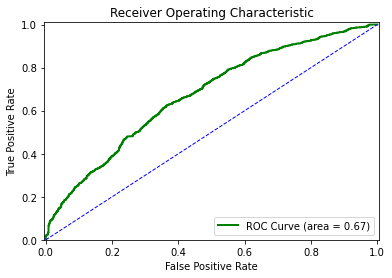

In [56]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC2)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

# Random  Forest Classifier:

In [57]:
bankrupt_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)

# Training ONLY on the training set:
bankrupt_RandomForest.fit(X_train, y_train)

# Testing on the testing set:
y_predict_randomforest = bankrupt_RandomForest.predict(X_test)

In [58]:
# Accuracy Evaluation
accuracy_randomforest = accuracy_score(y_test, y_predict_randomforest)
print(accuracy_randomforest)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_rf = bankrupt_RandomForest.predict_proba(X_test)

0.9787878787878788


In [59]:
# Likelihood Overview
print(y_test)

print(y_predict_randomforest)

# "estimated likelihood of both label" for the testing set:
print(y_predict_prob_rf)

# "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_rf[:,1])

6103     0
8930     1
495      0
4814     0
4060     0
        ..
5533     0
1599     0
12951    1
3345     0
12439    1
Name: Bankrupt?, Length: 3960, dtype: int64
[0 1 0 ... 1 1 1]
[[0.94736842 0.05263158]
 [0.         1.        ]
 [1.         0.        ]
 ...
 [0.05263158 0.94736842]
 [0.31578947 0.68421053]
 [0.         1.        ]]
[0.05263158 1.         0.         ... 0.94736842 0.68421053 1.        ]


In [60]:
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)

print(fpr3)
print(tpr3)

# AUC:
AUC3 = metrics.auc(fpr3, tpr3)
print(AUC3)

[0.00000000e+00 5.00250125e-04 2.00100050e-03 5.00250125e-03
 8.50425213e-03 1.15057529e-02 1.60080040e-02 2.30115058e-02
 2.50125063e-02 3.00150075e-02 3.50175088e-02 4.45222611e-02
 5.60280140e-02 6.90345173e-02 8.75437719e-02 1.16058029e-01
 1.44072036e-01 1.81090545e-01 2.56128064e-01 3.71185593e-01
 1.00000000e+00]
[0.         0.61346252 0.79143294 0.8745538  0.92299847 0.94441611
 0.96787353 0.97603264 0.98419174 0.98827129 0.99286079 0.99592045
 0.99694034 0.99796022 0.99847017 0.99898011 0.99949006 0.99949006
 1.         1.         1.        ]
0.9973458172227367


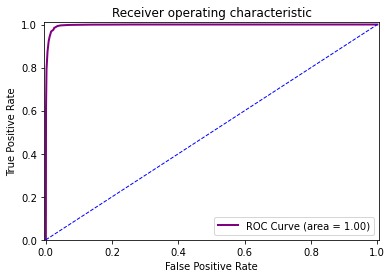

In [61]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr3, tpr3, color='purple', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC3)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# SVM (Support Vector Machine)

In [62]:
svm = SVC(probability=True)
# Training ONLY on the training set:
svm.fit(X_train, y_train)

# Testing on the testing set:
y_predict_svm = svm.predict(X_test)

#find accuracy of svm
score_svm = accuracy_score(y_test, y_predict_svm)
print("Accuracy for SVM: %.2f%%" % (score_svm * 100.0))


Accuracy for SVM: 82.07%


In [63]:
#AUC

#Estimates the probability of each label
y_predict_prob_SVM = svm.predict_proba(X_test)

# calculate True Positive Rate (TPR) and False Positive Rate (FPR)
fpr_SVM,tpr_SVM,thresholds_SVM = metrics.roc_curve(y_test,y_predict_prob_SVM[:,1],pos_label=1)

# AUC:
AUC_SVM = metrics.auc(fpr_SVM, tpr_SVM)
print('AUC for SVM:', AUC_SVM)

AUC for SVM: 0.8991311055833884


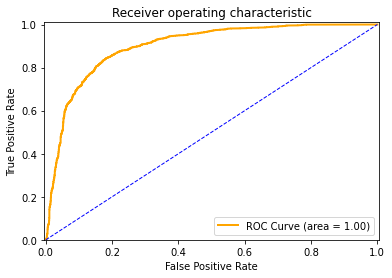

In [103]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_SVM, tpr_SVM, color='orange', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC3)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# XGBoost

In [64]:
# In the following line, "my_XGBoost" is instantiated as an "object" of XGBClassifier "class".
my_XGBoost = XGBClassifier()

my_XGBoost.fit(X_train, y_train)

#uses method predict of the trained object
y_predict_XGBoost = my_XGBoost.predict(X_test)

# Function "accuracy_score" returns percentage of correct predictions
score_XGBoost = accuracy_score(y_test, y_predict_XGBoost)

print("Accuracy for XGBoost: %.2f%%" % (score_XGBoost * 100.0))

Accuracy for XGBoost: 98.74%


In [101]:
#AUC

#Estimates the probability of each label
y_predict_prob_XGBoost = my_XGBoost.predict_proba(X_test)

# calculate True Positive Rate (TPR) and False Positive Rate (FPR)
fpr_XGBoost,tpr_XGBoost,thresholds_XGBoost = metrics.roc_curve(y_test,y_predict_prob_XGBoost[:,1],pos_label=1)

# AUC:
AUC_XGBoost = metrics.auc(fpr_XGBoost, tpr_XGBoost)
print('AUC for XGBoost:', AUC_XGBoost)

AUC for XGBoost: 0.9992535788547001


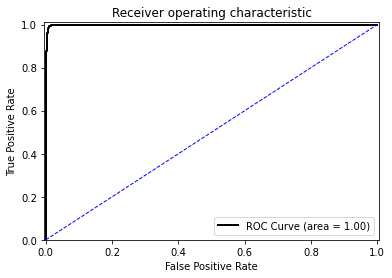

In [104]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_XGBoost, tpr_XGBoost, color='black', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC3)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Feature importance in XGBoost model

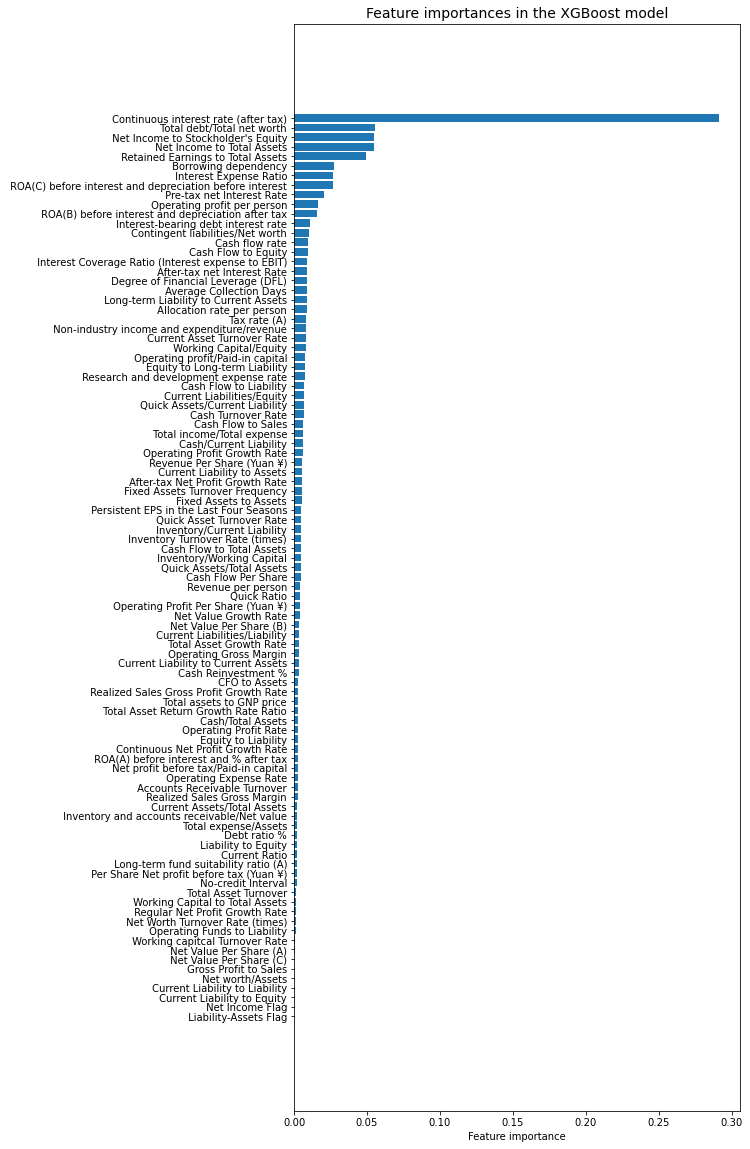

In [66]:
# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(my_XGBoost.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.1)

# ANN - Neural Network¶

# Before using breadth first search cv to find the best structure for an ANN with one hidden layer i will try myself to create different neurons with different number of neurons and test on the data set just to see what accuracy i get .¶


In [68]:
from sklearn.neural_network import MLPClassifier

#checking the datasets 
X_train[::]

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
7675,0.454236,0.511209,0.499944,0.598219,0.598219,0.998952,0.797217,0.809139,0.303260,0.781402,...,0.746457,0.006107,0.621778,0.598220,0.832221,0.293978,0.026628,0.564091,1,0.015370
782,0.521669,0.572285,0.564163,0.608145,0.608145,0.998995,0.797566,0.809441,0.303779,0.781717,...,0.814862,0.001283,0.623384,0.608144,0.842202,0.284532,0.026964,0.565867,1,0.020059
1742,0.509628,0.540994,0.550725,0.599483,0.599483,0.998962,0.797425,0.809340,0.303601,0.781547,...,0.800274,0.001241,0.623177,0.599478,0.840318,0.277313,0.027240,0.566661,1,0.047013
3401,0.489251,0.541485,0.541303,0.607165,0.607208,0.999016,0.797426,0.809340,0.303490,0.781633,...,0.800896,0.004114,0.623814,0.607165,0.840440,0.279708,0.027003,0.565999,1,0.029489
12963,0.462870,0.535634,0.515170,0.600264,0.600264,0.998914,0.797291,0.809223,0.303467,0.781381,...,0.787309,0.001921,0.621811,0.600261,0.838343,0.296129,0.024921,0.577008,1,0.014913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,0.468581,0.535816,0.519193,0.640316,0.640316,0.999384,0.797923,0.809678,0.303590,0.781968,...,0.798928,0.001703,0.624423,0.640316,0.840223,0.276905,0.026806,0.565227,1,0.053767
11798,0.445665,0.500769,0.496171,0.598276,0.598276,0.998993,0.797211,0.809147,0.303162,0.781393,...,0.774664,0.009382,0.631475,0.598274,0.838146,0.282161,0.028090,0.566155,1,0.023716
6637,0.479842,0.546718,0.531292,0.595937,0.595937,0.998947,0.797514,0.809422,0.303787,0.781698,...,0.804093,0.012426,0.622299,0.595935,0.840633,0.278555,0.027041,0.566121,1,0.035220
2575,0.518842,0.559802,0.560362,0.634500,0.634500,0.999020,0.797445,0.809352,0.303513,0.781613,...,0.806752,0.001237,0.623632,0.634495,0.841411,0.286340,0.027300,0.566796,1,0.018534


# ANN with 30 neurons , one hidden layer

In [69]:
# training an ann
# 1 Hidden Layer with 30 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

In [70]:
my_ANN.fit(X_train, y_train)

Iteration 1, loss = 7.05111322
Iteration 2, loss = 1.20159953
Iteration 3, loss = 1.23157050
Iteration 4, loss = 1.14341994
Iteration 5, loss = 1.17521869
Iteration 6, loss = 1.18479128
Iteration 7, loss = 1.17181377
Iteration 8, loss = 1.13829387
Iteration 9, loss = 1.14219919
Iteration 10, loss = 1.13477546
Iteration 11, loss = 1.13068567
Iteration 12, loss = 1.13069573
Iteration 13, loss = 1.13057749
Iteration 14, loss = 1.13125158
Iteration 15, loss = 1.13141955
Iteration 16, loss = 1.13083609
Iteration 17, loss = 1.13066296
Iteration 18, loss = 1.13090335
Iteration 19, loss = 1.13035408
Iteration 20, loss = 1.13057728
Iteration 21, loss = 1.13062675
Iteration 22, loss = 1.13071168
Iteration 23, loss = 1.13048278
Iteration 24, loss = 1.13063015
Iteration 25, loss = 1.13055952
Iteration 26, loss = 1.13217938
Iteration 27, loss = 1.13135159
Iteration 28, loss = 1.13011678
Iteration 29, loss = 1.13145678
Iteration 30, loss = 1.13020996
Iteration 31, loss = 1.13008433
Iteration 32, los

MLPClassifier(alpha=1, hidden_layer_sizes=(30,), learning_rate_init=0.1,
              random_state=1, verbose=True)

In [71]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.5095959595959596


In [72]:
#Trying 10 cv 
from sklearn.model_selection import cross_val_score

accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

Iteration 1, loss = 5.92839808
Iteration 2, loss = 1.21064165
Iteration 3, loss = 1.11150419
Iteration 4, loss = 1.09912021
Iteration 5, loss = 1.10854734
Iteration 6, loss = 1.12386146
Iteration 7, loss = 1.10259597
Iteration 8, loss = 1.09996237
Iteration 9, loss = 1.10879964
Iteration 10, loss = 1.10871358
Iteration 11, loss = 1.10016706
Iteration 12, loss = 1.10551060
Iteration 13, loss = 1.09974564
Iteration 14, loss = 1.09986711
Iteration 15, loss = 1.10004239
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 5.70886401
Iteration 2, loss = 1.24873265
Iteration 3, loss = 1.10278702
Iteration 4, loss = 1.09971923
Iteration 5, loss = 1.09064870
Iteration 6, loss = 1.08456918
Iteration 7, loss = 1.07894192
Iteration 8, loss = 1.07794627
Iteration 9, loss = 1.07808464
Iteration 10, loss = 1.07788657
Iteration 11, loss = 1.07521210
Iteration 12, loss = 1.07491783
Iteration 13, loss = 1.07484502
Iteration 14, loss = 1.07507517


Iteration 27, loss = 1.09856892
Iteration 28, loss = 1.09975072
Iteration 29, loss = 1.09890701
Iteration 30, loss = 1.09857693
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 5.24062449
Iteration 2, loss = 1.11007947
Iteration 3, loss = 1.08839843
Iteration 4, loss = 1.08796130
Iteration 5, loss = 1.08790883
Iteration 6, loss = 1.08801448
Iteration 7, loss = 1.08808202
Iteration 8, loss = 1.08810917
Iteration 9, loss = 1.08803088
Iteration 10, loss = 1.08832593
Iteration 11, loss = 1.08820371
Iteration 12, loss = 1.08875699
Iteration 13, loss = 1.08938796
Iteration 14, loss = 1.08792038
Iteration 15, loss = 1.08839557
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4.98564210
Iteration 2, loss = 1.13177155
Iteration 3, loss = 1.07924357
Iteration 4, loss = 1.07000106
Iteration 5, loss = 1.05811194
Iteration 6, loss = 1.05838308
Iteration 7, loss = 1.05847696
Iter

In [73]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.520684345348864


# As we can see the accuracy of our neural network is really bad. There was a 2 percent increase when using CV . Lets try different hyper parameters for our ann .

# ANN with 50 neurons , one hidden layer , learning rate init = .01

In [74]:
#training an ann
# 1 Hidden Layer with 50 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(50,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 14.17761075
Iteration 2, loss = 10.67488696
Iteration 3, loss = 10.76081691
Iteration 4, loss = 9.86048549
Iteration 5, loss = 9.06332645
Iteration 6, loss = 8.92646710
Iteration 7, loss = 8.37902112
Iteration 8, loss = 9.24469600
Iteration 9, loss = 8.96835716
Iteration 10, loss = 9.67384286
Iteration 11, loss = 9.65310598
Iteration 12, loss = 8.71974907
Iteration 13, loss = 9.12496770
Iteration 14, loss = 7.96429653
Iteration 15, loss = 8.59906171
Iteration 16, loss = 8.51883965
Iteration 17, loss = 8.42497683
Iteration 18, loss = 7.92397119
Iteration 19, loss = 8.45268916
Iteration 20, loss = 9.50114035
Iteration 21, loss = 8.39378165
Iteration 22, loss = 7.56050187
Iteration 23, loss = 7.42189394
Iteration 24, loss = 7.97104089
Iteration 25, loss = 8.80608734
Iteration 26, loss = 8.28709985
Iteration 27, loss = 7.90802549
Iteration 28, loss = 7.79382873
Iteration 29, loss = 8.00755831
Iteration 30, loss = 8.46692722
Iteration 31, loss = 7.84243368
Iteration 32, 

MLPClassifier(alpha=1, hidden_layer_sizes=(50,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [75]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.7712121212121212


# We see an increase in the accuracy from 50 to 70% , when we change the learning_rate_init to .01 and we increase the number of neurons to 50 .

In [76]:
#Trying 10 cv 
from sklearn.model_selection import cross_val_score

accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

Iteration 1, loss = 13.35218579
Iteration 2, loss = 10.59146554
Iteration 3, loss = 9.57359051
Iteration 4, loss = 9.42975093
Iteration 5, loss = 9.08148513
Iteration 6, loss = 8.26216295
Iteration 7, loss = 8.92342527
Iteration 8, loss = 8.95804333
Iteration 9, loss = 8.39531414
Iteration 10, loss = 8.05311900
Iteration 11, loss = 8.23952651
Iteration 12, loss = 8.60020118
Iteration 13, loss = 7.92623355
Iteration 14, loss = 8.11662442
Iteration 15, loss = 7.63161907
Iteration 16, loss = 8.40445926
Iteration 17, loss = 8.76641176
Iteration 18, loss = 7.72833742
Iteration 19, loss = 7.56494413
Iteration 20, loss = 8.46373747
Iteration 21, loss = 7.60685155
Iteration 22, loss = 7.65281885
Iteration 23, loss = 7.85562045
Iteration 24, loss = 8.22122258
Iteration 25, loss = 8.00545860
Iteration 26, loss = 7.71260923
Iteration 27, loss = 7.42379151
Iteration 28, loss = 7.08056974
Iteration 29, loss = 8.11193668
Iteration 30, loss = 7.53904000
Iteration 31, loss = 7.77609341
Iteration 32, l

Iteration 6, loss = 9.21853803
Iteration 7, loss = 9.90885160
Iteration 8, loss = 8.93448015
Iteration 9, loss = 8.58267186
Iteration 10, loss = 8.45001071
Iteration 11, loss = 8.14077443
Iteration 12, loss = 9.29986842
Iteration 13, loss = 8.03442862
Iteration 14, loss = 7.62629625
Iteration 15, loss = 9.79723727
Iteration 16, loss = 8.08567500
Iteration 17, loss = 8.60415646
Iteration 18, loss = 8.11410048
Iteration 19, loss = 8.34408781
Iteration 20, loss = 8.75374455
Iteration 21, loss = 7.73178848
Iteration 22, loss = 8.22947206
Iteration 23, loss = 7.69976010
Iteration 24, loss = 8.67606769
Iteration 25, loss = 7.60774863
Iteration 26, loss = 7.69689290
Iteration 27, loss = 8.67344087
Iteration 28, loss = 8.36133444
Iteration 29, loss = 8.48894466
Iteration 30, loss = 7.84908082
Iteration 31, loss = 7.83371085
Iteration 32, loss = 8.72588255
Iteration 33, loss = 8.11208981
Iteration 34, loss = 8.23939136
Iteration 35, loss = 8.38751640
Iteration 36, loss = 8.34825664
Training los

In [77]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.7632131780274313


# using 10 cross validation still gives us a score of 70 percent . 

# What happens if we keep increasing the number of neurons ?  # 

# ANN with 70 neurons , one hidden layer , learning rate init = .01 


In [78]:
#training an ann
# 1 Hidden Layer with 70 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 14.43093333
Iteration 2, loss = 10.66300141
Iteration 3, loss = 10.50116559
Iteration 4, loss = 9.19623692
Iteration 5, loss = 9.27932607
Iteration 6, loss = 8.11578271
Iteration 7, loss = 8.78145647
Iteration 8, loss = 7.96684272
Iteration 9, loss = 8.36366902
Iteration 10, loss = 7.44667355
Iteration 11, loss = 8.27341046
Iteration 12, loss = 7.60108532
Iteration 13, loss = 7.50406730
Iteration 14, loss = 7.76928092
Iteration 15, loss = 8.39235271
Iteration 16, loss = 6.95619681
Iteration 17, loss = 7.54179796
Iteration 18, loss = 7.46537844
Iteration 19, loss = 7.41991103
Iteration 20, loss = 7.10435084
Iteration 21, loss = 7.15570899
Iteration 22, loss = 7.77875746
Iteration 23, loss = 7.53259192
Iteration 24, loss = 6.98577040
Iteration 25, loss = 7.58012150
Iteration 26, loss = 7.85811063
Iteration 27, loss = 6.82773262
Iteration 28, loss = 7.11683280
Iteration 29, loss = 7.02784068
Iteration 30, loss = 6.58639767
Iteration 31, loss = 6.63603089
Iteration 32, 

MLPClassifier(alpha=1, hidden_layer_sizes=(70,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [79]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.8065656565656566


# Accuracy keeps increasing ^ . 

# ANN with 200 neurons , one hidden layer , learning rate init = .01 

In [80]:
my_ANN = MLPClassifier(hidden_layer_sizes=(200,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 14.39707180
Iteration 2, loss = 10.82066936
Iteration 3, loss = 9.82474400
Iteration 4, loss = 9.36670818
Iteration 5, loss = 8.20005936
Iteration 6, loss = 8.65996461
Iteration 7, loss = 7.87421393
Iteration 8, loss = 8.41199448
Iteration 9, loss = 7.30325283
Iteration 10, loss = 8.43470310
Iteration 11, loss = 7.78639332
Iteration 12, loss = 8.11332037
Iteration 13, loss = 7.80896645
Iteration 14, loss = 7.93240145
Iteration 15, loss = 6.65370609
Iteration 16, loss = 7.43332912
Iteration 17, loss = 7.23338362
Iteration 18, loss = 6.16704926
Iteration 19, loss = 7.20027890
Iteration 20, loss = 7.46396115
Iteration 21, loss = 6.99323364
Iteration 22, loss = 7.94602403
Iteration 23, loss = 6.30642498
Iteration 24, loss = 6.63960751
Iteration 25, loss = 6.45346493
Iteration 26, loss = 7.04724949
Iteration 27, loss = 6.78666042
Iteration 28, loss = 6.59643196
Iteration 29, loss = 7.13573287
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs.

MLPClassifier(alpha=1, hidden_layer_sizes=(200,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [81]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.8366161616161616


# at 200 neurons we see still an increase to 80% , but it seems to me there was a decrese between 100-200.

# ANN with 150 neurons , one hidden layer , learning rate init = .01  

In [82]:
my_ANN = MLPClassifier(hidden_layer_sizes=(150,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 13.61676315
Iteration 2, loss = 11.13636670
Iteration 3, loss = 11.52525231
Iteration 4, loss = 9.79331165
Iteration 5, loss = 8.97768966
Iteration 6, loss = 9.01862620
Iteration 7, loss = 10.64737402
Iteration 8, loss = 8.77473831
Iteration 9, loss = 8.83672576
Iteration 10, loss = 7.41328642
Iteration 11, loss = 7.64405912
Iteration 12, loss = 8.27907944
Iteration 13, loss = 8.05767040
Iteration 14, loss = 7.08432660
Iteration 15, loss = 7.05953471
Iteration 16, loss = 7.51102063
Iteration 17, loss = 8.85673503
Iteration 18, loss = 7.59104389
Iteration 19, loss = 7.61730272
Iteration 20, loss = 7.11295257
Iteration 21, loss = 7.37020571
Iteration 22, loss = 6.65119289
Iteration 23, loss = 7.41656202
Iteration 24, loss = 6.80888258
Iteration 25, loss = 7.23832986
Iteration 26, loss = 6.72721158
Iteration 27, loss = 6.63805662
Iteration 28, loss = 6.94358670
Iteration 29, loss = 7.91707280
Iteration 30, loss = 6.36131378
Iteration 31, loss = 7.52083624
Iteration 32,

# We see a decrease when the number of neurons is from 100-200 ^

# What happens if we use a different activation function ?  

In [83]:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'tanh', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 0.82207542
Iteration 2, loss = 0.79279612
Iteration 3, loss = 0.82565728
Iteration 4, loss = 0.85628749
Iteration 5, loss = 0.66472091
Iteration 6, loss = 0.67736239
Iteration 7, loss = 0.67145210
Iteration 8, loss = 0.68488793
Iteration 9, loss = 0.68174050
Iteration 10, loss = 0.66633259
Iteration 11, loss = 0.65937561
Iteration 12, loss = 0.67003336
Iteration 13, loss = 0.66104509
Iteration 14, loss = 0.67845540
Iteration 15, loss = 0.64138527
Iteration 16, loss = 0.61945988
Iteration 17, loss = 0.61631963
Iteration 18, loss = 0.60819760
Iteration 19, loss = 0.61138253
Iteration 20, loss = 0.59462624
Iteration 21, loss = 0.60829090
Iteration 22, loss = 0.61973790
Iteration 23, loss = 0.64042437
Iteration 24, loss = 0.61047445
Iteration 25, loss = 0.60375300
Iteration 26, loss = 0.60898268
Iteration 27, loss = 0.61648058
Iteration 28, loss = 0.67649325
Iteration 29, loss = 0.65243643
Iteration 30, loss = 0.65286943
Iteration 31, loss = 0.66030334
Training loss did

In [84]:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 0.72105345
Iteration 2, loss = 0.70822536
Iteration 3, loss = 0.71228445
Iteration 4, loss = 0.72216093
Iteration 5, loss = 0.68074019
Iteration 6, loss = 0.67950011
Iteration 7, loss = 0.69114956
Iteration 8, loss = 0.70086939
Iteration 9, loss = 0.68431680
Iteration 10, loss = 0.66242851
Iteration 11, loss = 0.65869017
Iteration 12, loss = 0.67143932
Iteration 13, loss = 0.69593405
Iteration 14, loss = 0.66686244
Iteration 15, loss = 0.66385158
Iteration 16, loss = 0.66924289
Iteration 17, loss = 0.66616758
Iteration 18, loss = 0.67051249
Iteration 19, loss = 0.66789705
Iteration 20, loss = 0.66129270
Iteration 21, loss = 0.65700410
Iteration 22, loss = 0.65248815
Iteration 23, loss = 0.67024431
Iteration 24, loss = 0.66533719
Iteration 25, loss = 0.66207097
Iteration 26, loss = 0.67705901
Iteration 27, loss = 0.66997219
Iteration 28, loss = 0.67070929
Iteration 29, loss = 0.65006801
Iteration 30, loss = 0.63816154
Iteration 31, loss = 0.63055831
Iteration 32, los

# We see a low accuracy to our sweet spot # of neurons of 200 . This may be since we need an activation function that is for classifiers like in this case . We can keep using relu or try a new one like sigmoid. ^ 

# Based on the different neurons i tested , the one with 80 neurons and 200 neurons in one hidden layer , and learning rate 0.01 are the one that gives me best accuracy of about 80- 83% . 

# Now lets try to use GridSearchCV to find the best number of neurons 

In [85]:
seed = 1  
np.random.seed(seed)

In [86]:

from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(80,250,10)] #From my testing ive seen that we get the best results from 5-200 and then starts dying above 200

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
#print(grid.cv_results_)



{'hidden_layer_sizes': [(80,), (90,), (100,), (110,), (120,), (130,), (140,), (150,), (160,), (170,), (180,), (190,), (200,), (210,), (220,), (230,), (240,)]} 

Iteration 1, loss = 13.59145417
Iteration 2, loss = 11.08984348
Iteration 3, loss = 10.50990148
Iteration 4, loss = 8.89724115
Iteration 5, loss = 9.28846572
Iteration 6, loss = 8.21874860
Iteration 7, loss = 7.43028255
Iteration 8, loss = 7.74086701
Iteration 9, loss = 8.27461835
Iteration 10, loss = 7.10598033
Iteration 11, loss = 7.25307505
Iteration 12, loss = 7.60148865
Iteration 13, loss = 6.80236120
Iteration 14, loss = 7.41495064
Iteration 15, loss = 6.48984214
Iteration 16, loss = 7.05402071
Iteration 17, loss = 7.23262838
Iteration 18, loss = 6.33672852
Iteration 19, loss = 6.75849997
Iteration 20, loss = 6.70196058
Iteration 21, loss = 6.43745126
Iteration 22, loss = 6.23771966
Iteration 23, loss = 6.81603335
Iteration 24, loss = 6.97271256
Iteration 25, loss = 5.80649686
Iteration 26, loss = 6.45734374
Iteration 27,

Iteration 34, loss = 7.01858947
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.94934651
Iteration 2, loss = 10.77854430
Iteration 3, loss = 9.81863651
Iteration 4, loss = 9.41517239
Iteration 5, loss = 8.87685644
Iteration 6, loss = 8.79798606
Iteration 7, loss = 8.97738308
Iteration 8, loss = 7.87524744
Iteration 9, loss = 7.95409981
Iteration 10, loss = 8.21416256
Iteration 11, loss = 7.64204307
Iteration 12, loss = 7.73494979
Iteration 13, loss = 8.69569527
Iteration 14, loss = 8.46712911
Iteration 15, loss = 7.27093208
Iteration 16, loss = 7.30559616
Iteration 17, loss = 7.98941313
Iteration 18, loss = 7.12016439
Iteration 19, loss = 7.09532716
Iteration 20, loss = 7.78405213
Iteration 21, loss = 8.22518049
Iteration 22, loss = 6.41223653
Iteration 23, loss = 7.58803542
Iteration 24, loss = 6.59720440
Iteration 25, loss = 6.65701739
Iteration 26, loss = 7.72046605
Iteration 27, loss = 7.27640341
Iteration 28, loss = 

Iteration 16, loss = 7.81774210
Iteration 17, loss = 7.25927946
Iteration 18, loss = 6.83159908
Iteration 19, loss = 8.93073405
Iteration 20, loss = 7.79982443
Iteration 21, loss = 7.40401473
Iteration 22, loss = 6.59929104
Iteration 23, loss = 7.52942514
Iteration 24, loss = 6.75874671
Iteration 25, loss = 7.50854042
Iteration 26, loss = 7.53427185
Iteration 27, loss = 7.40798570
Iteration 28, loss = 7.36775901
Iteration 29, loss = 7.50829443
Iteration 30, loss = 7.76949694
Iteration 31, loss = 7.68144730
Iteration 32, loss = 7.59725758
Iteration 33, loss = 7.10033343
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.09828521
Iteration 2, loss = 9.61235342
Iteration 3, loss = 8.86505138
Iteration 4, loss = 8.55905654
Iteration 5, loss = 8.73772971
Iteration 6, loss = 9.25626210
Iteration 7, loss = 8.08600375
Iteration 8, loss = 8.03276970
Iteration 9, loss = 8.71976921
Iteration 10, loss = 7.51559580
Iteration 11, loss = 7

Iteration 24, loss = 8.13415986
Iteration 25, loss = 7.78645500
Iteration 26, loss = 7.28514717
Iteration 27, loss = 6.79672461
Iteration 28, loss = 7.01146621
Iteration 29, loss = 7.44305562
Iteration 30, loss = 6.72596124
Iteration 31, loss = 7.65142266
Iteration 32, loss = 7.69367976
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.86542210
Iteration 2, loss = 9.87297217
Iteration 3, loss = 9.36219833
Iteration 4, loss = 9.47951764
Iteration 5, loss = 8.64724176
Iteration 6, loss = 8.33618568
Iteration 7, loss = 8.36073073
Iteration 8, loss = 8.12315941
Iteration 9, loss = 7.45825610
Iteration 10, loss = 7.70508668
Iteration 11, loss = 6.82571136
Iteration 12, loss = 7.77482976
Iteration 13, loss = 7.40729551
Iteration 14, loss = 7.07811589
Iteration 15, loss = 7.19823925
Iteration 16, loss = 7.15623055
Iteration 17, loss = 6.58435482
Iteration 18, loss = 6.16879919
Iteration 19, loss = 7.50362502
Iteration 20, loss = 6

Iteration 32, loss = 7.54333224
Iteration 33, loss = 7.85626800
Iteration 34, loss = 7.55036066
Iteration 35, loss = 7.61427021
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.69273484
Iteration 2, loss = 10.67643132
Iteration 3, loss = 10.43403725
Iteration 4, loss = 9.02782892
Iteration 5, loss = 9.50927767
Iteration 6, loss = 8.08057318
Iteration 7, loss = 8.56863566
Iteration 8, loss = 8.60118975
Iteration 9, loss = 8.51565462
Iteration 10, loss = 8.18644564
Iteration 11, loss = 8.27691284
Iteration 12, loss = 8.23711974
Iteration 13, loss = 8.49411392
Iteration 14, loss = 7.84742323
Iteration 15, loss = 8.40825450
Iteration 16, loss = 7.95571809
Iteration 17, loss = 7.16489407
Iteration 18, loss = 7.23124294
Iteration 19, loss = 7.96911707
Iteration 20, loss = 7.85439380
Iteration 21, loss = 7.49686793
Iteration 22, loss = 7.00151099
Iteration 23, loss = 7.03099444
Iteration 24, loss = 7.60695823
Iteration 25, loss =

Iteration 11, loss = 7.41790011
Iteration 12, loss = 7.80965518
Iteration 13, loss = 7.50298521
Iteration 14, loss = 7.37473432
Iteration 15, loss = 8.09446106
Iteration 16, loss = 6.50035307
Iteration 17, loss = 7.38434899
Iteration 18, loss = 7.31793239
Iteration 19, loss = 7.33539610
Iteration 20, loss = 6.62442879
Iteration 21, loss = 6.66561610
Iteration 22, loss = 6.90043222
Iteration 23, loss = 7.42994046
Iteration 24, loss = 8.09960447
Iteration 25, loss = 6.34596764
Iteration 26, loss = 6.30366369
Iteration 27, loss = 6.98313730
Iteration 28, loss = 7.01497835
Iteration 29, loss = 7.06846162
Iteration 30, loss = 7.20545969
Iteration 31, loss = 7.02600199
Iteration 32, loss = 7.10617988
Iteration 33, loss = 7.35948028
Iteration 34, loss = 6.79138491
Iteration 35, loss = 7.15079641
Iteration 36, loss = 7.32010433
Iteration 37, loss = 7.33665351
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.55129384
Iteration 2, l

Iteration 6, loss = 8.63594716
Iteration 7, loss = 7.96286185
Iteration 8, loss = 7.88959834
Iteration 9, loss = 9.18192138
Iteration 10, loss = 7.66508584
Iteration 11, loss = 7.48029034
Iteration 12, loss = 7.51006582
Iteration 13, loss = 7.49613907
Iteration 14, loss = 6.88812760
Iteration 15, loss = 6.98213406
Iteration 16, loss = 7.03618655
Iteration 17, loss = 6.83948703
Iteration 18, loss = 7.23323988
Iteration 19, loss = 7.36299123
Iteration 20, loss = 7.14422660
Iteration 21, loss = 7.37369129
Iteration 22, loss = 7.07189224
Iteration 23, loss = 7.26605949
Iteration 24, loss = 6.93950600
Iteration 25, loss = 7.35034929
Iteration 26, loss = 7.33417919
Iteration 27, loss = 6.60664397
Iteration 28, loss = 7.07441063
Iteration 29, loss = 6.58028495
Iteration 30, loss = 7.32439353
Iteration 31, loss = 6.46442467
Iteration 32, loss = 7.41739540
Iteration 33, loss = 6.93148056
Iteration 34, loss = 7.45438526
Iteration 35, loss = 6.48517762
Iteration 36, loss = 6.58005093
Iteration 37

Iteration 23, loss = 7.28184838
Iteration 24, loss = 7.75682110
Iteration 25, loss = 6.96340791
Iteration 26, loss = 7.72144194
Iteration 27, loss = 7.75387097
Iteration 28, loss = 7.06091998
Iteration 29, loss = 6.58283990
Iteration 30, loss = 6.85065967
Iteration 31, loss = 7.32649401
Iteration 32, loss = 8.55414752
Iteration 33, loss = 7.36595853
Iteration 34, loss = 7.55858040
Iteration 35, loss = 7.48944674
Iteration 36, loss = 7.29579841
Iteration 37, loss = 7.83357130
Iteration 38, loss = 7.86707685
Iteration 39, loss = 7.57449087
Iteration 40, loss = 7.00594359
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.06400944
Iteration 2, loss = 10.63513588
Iteration 3, loss = 9.74811004
Iteration 4, loss = 9.18379453
Iteration 5, loss = 9.13133220
Iteration 6, loss = 8.54840492
Iteration 7, loss = 8.23334041
Iteration 8, loss = 7.61161312
Iteration 9, loss = 8.15323479
Iteration 10, loss = 7.87947444
Iteration 11, loss = 

Iteration 16, loss = 7.26926341
Iteration 17, loss = 6.52510160
Iteration 18, loss = 7.86872191
Iteration 19, loss = 7.05778146
Iteration 20, loss = 7.15249375
Iteration 21, loss = 6.61301368
Iteration 22, loss = 6.68297563
Iteration 23, loss = 6.83204719
Iteration 24, loss = 6.84881764
Iteration 25, loss = 6.47033132
Iteration 26, loss = 6.92360634
Iteration 27, loss = 7.01464629
Iteration 28, loss = 7.36843553
Iteration 29, loss = 7.37608361
Iteration 30, loss = 7.10500064
Iteration 31, loss = 6.83780857
Iteration 32, loss = 7.44249068
Iteration 33, loss = 7.25017475
Iteration 34, loss = 6.70842611
Iteration 35, loss = 7.17031920
Iteration 36, loss = 6.76715720
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.86196865
Iteration 2, loss = 10.04459364
Iteration 3, loss = 9.35874822
Iteration 4, loss = 8.38570675
Iteration 5, loss = 8.42058099
Iteration 6, loss = 8.16791407
Iteration 7, loss = 7.25653280
Iteration 8, loss =

Iteration 12, loss = 8.23933056
Iteration 13, loss = 7.73534052
Iteration 14, loss = 7.21058701
Iteration 15, loss = 7.82556290
Iteration 16, loss = 7.35548805
Iteration 17, loss = 8.03290183
Iteration 18, loss = 6.51373627
Iteration 19, loss = 7.23768815
Iteration 20, loss = 7.99191402
Iteration 21, loss = 6.81255815
Iteration 22, loss = 6.79453521
Iteration 23, loss = 7.20268779
Iteration 24, loss = 7.41836276
Iteration 25, loss = 6.82900274
Iteration 26, loss = 7.52782278
Iteration 27, loss = 7.22328299
Iteration 28, loss = 7.35429763
Iteration 29, loss = 7.46305285
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.15470956
Iteration 2, loss = 11.05208779
Iteration 3, loss = 9.00258002
Iteration 4, loss = 9.97821794
Iteration 5, loss = 8.92597583
Iteration 6, loss = 8.66250539
Iteration 7, loss = 8.15782300
Iteration 8, loss = 8.30823957
Iteration 9, loss = 7.60493603
Iteration 10, loss = 7.84714603
Iteration 11, loss = 

Iteration 1, loss = 13.61505410
Iteration 2, loss = 10.72682549
Iteration 3, loss = 10.54830759
Iteration 4, loss = 9.48225720
Iteration 5, loss = 9.36914993
Iteration 6, loss = 8.30374484
Iteration 7, loss = 8.65592493
Iteration 8, loss = 8.95034708
Iteration 9, loss = 8.72198882
Iteration 10, loss = 8.72088029
Iteration 11, loss = 8.73185729
Iteration 12, loss = 7.41387926
Iteration 13, loss = 7.55166583
Iteration 14, loss = 7.52322757
Iteration 15, loss = 7.24404756
Iteration 16, loss = 8.09391311
Iteration 17, loss = 7.88550209
Iteration 18, loss = 6.96131865
Iteration 19, loss = 6.95946700
Iteration 20, loss = 7.26633457
Iteration 21, loss = 7.69270205
Iteration 22, loss = 6.84896931
Iteration 23, loss = 6.98425899
Iteration 24, loss = 8.59520726
Iteration 25, loss = 7.13680536
Iteration 26, loss = 6.53659883
Iteration 27, loss = 7.58823919
Iteration 28, loss = 6.18192861
Iteration 29, loss = 6.91180918
Iteration 30, loss = 7.08174721
Iteration 31, loss = 6.70463321
Iteration 32, 

Iteration 24, loss = 6.30763991
Iteration 25, loss = 6.92152504
Iteration 26, loss = 6.67398767
Iteration 27, loss = 7.22582259
Iteration 28, loss = 6.94834255
Iteration 29, loss = 6.51827259
Iteration 30, loss = 6.67190773
Iteration 31, loss = 6.44659329
Iteration 32, loss = 6.93374245
Iteration 33, loss = 7.25708745
Iteration 34, loss = 7.09781097
Iteration 35, loss = 6.89211191
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.23915281
Iteration 2, loss = 11.33627522
Iteration 3, loss = 9.78813643
Iteration 4, loss = 9.40000356
Iteration 5, loss = 8.33839796
Iteration 6, loss = 9.21794348
Iteration 7, loss = 8.13165999
Iteration 8, loss = 8.81014381
Iteration 9, loss = 7.62273658
Iteration 10, loss = 7.83745375
Iteration 11, loss = 7.44500437
Iteration 12, loss = 7.79699874
Iteration 13, loss = 7.33416326
Iteration 14, loss = 7.04838678
Iteration 15, loss = 6.93356383
Iteration 16, loss = 7.48276034
Iteration 17, loss = 

Iteration 1, loss = 13.04401137
Iteration 2, loss = 10.63294344
Iteration 3, loss = 8.44113556
Iteration 4, loss = 8.93590108
Iteration 5, loss = 8.72248217
Iteration 6, loss = 8.43806090
Iteration 7, loss = 7.74587648
Iteration 8, loss = 7.24436990
Iteration 9, loss = 7.56293041
Iteration 10, loss = 7.47854003
Iteration 11, loss = 7.23712913
Iteration 12, loss = 6.68029180
Iteration 13, loss = 6.54537333
Iteration 14, loss = 7.22832223
Iteration 15, loss = 8.13490595
Iteration 16, loss = 6.65503151
Iteration 17, loss = 6.82279927
Iteration 18, loss = 6.79321682
Iteration 19, loss = 6.61451856
Iteration 20, loss = 6.89302936
Iteration 21, loss = 6.66452391
Iteration 22, loss = 7.02783241
Iteration 23, loss = 7.01061125
Iteration 24, loss = 6.81029952
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.34626003
Iteration 2, loss = 11.08053084
Iteration 3, loss = 9.25235087
Iteration 4, loss = 8.80732950
Iteration 5, loss = 7.9

Iteration 10, loss = 7.64614336
Iteration 11, loss = 7.28082394
Iteration 12, loss = 7.52567433
Iteration 13, loss = 7.17305634
Iteration 14, loss = 7.57666089
Iteration 15, loss = 7.08180773
Iteration 16, loss = 7.03015595
Iteration 17, loss = 7.67267669
Iteration 18, loss = 6.71082298
Iteration 19, loss = 7.31069683
Iteration 20, loss = 6.80064025
Iteration 21, loss = 6.60873533
Iteration 22, loss = 7.02042602
Iteration 23, loss = 7.32248132
Iteration 24, loss = 6.76966927
Iteration 25, loss = 6.45015679
Iteration 26, loss = 6.95224349
Iteration 27, loss = 7.62804560
Iteration 28, loss = 7.50059917
Iteration 29, loss = 6.93648805
Iteration 30, loss = 7.37051964
Iteration 31, loss = 7.06445321
Iteration 32, loss = 7.48646430
Iteration 33, loss = 7.25835437
Iteration 34, loss = 7.54667809
Iteration 35, loss = 7.22911322
Iteration 36, loss = 7.55126626
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.50179095
Iteration 2, l

Iteration 31, loss = 7.81696088
Iteration 32, loss = 6.70047061
Iteration 33, loss = 7.03842186
Iteration 34, loss = 6.72706825
Iteration 35, loss = 6.24499212
Iteration 36, loss = 6.79631756
Iteration 37, loss = 6.74883691
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.20581942
Iteration 2, loss = 10.39612919
Iteration 3, loss = 9.24596196
Iteration 4, loss = 8.19594754
Iteration 5, loss = 9.12546294
Iteration 6, loss = 8.35579353
Iteration 7, loss = 7.70459208
Iteration 8, loss = 7.80714256
Iteration 9, loss = 7.48973748
Iteration 10, loss = 7.41035307
Iteration 11, loss = 8.05546347
Iteration 12, loss = 7.59033874
Iteration 13, loss = 7.84367593
Iteration 14, loss = 6.76387136
Iteration 15, loss = 7.95312743
Iteration 16, loss = 7.21217004
Iteration 17, loss = 7.04335884
Iteration 18, loss = 7.22273039
Iteration 19, loss = 7.32532388
Iteration 20, loss = 7.39082380
Iteration 21, loss = 6.83039794
Iteration 22, loss = 

Iteration 3, loss = 9.31311863
Iteration 4, loss = 8.47835201
Iteration 5, loss = 8.72752865
Iteration 6, loss = 7.34025923
Iteration 7, loss = 8.27990533
Iteration 8, loss = 7.23335207
Iteration 9, loss = 7.09826409
Iteration 10, loss = 6.79253377
Iteration 11, loss = 6.86395200
Iteration 12, loss = 6.99692581
Iteration 13, loss = 6.95785580
Iteration 14, loss = 6.74748658
Iteration 15, loss = 6.89577772
Iteration 16, loss = 6.92032523
Iteration 17, loss = 7.26052575
Iteration 18, loss = 6.16736259
Iteration 19, loss = 6.07633453
Iteration 20, loss = 6.42126205
Iteration 21, loss = 6.55677524
Iteration 22, loss = 6.07248803
Iteration 23, loss = 6.37064004
Iteration 24, loss = 6.74490202
Iteration 25, loss = 6.76000663
Iteration 26, loss = 7.03108239
Iteration 27, loss = 6.67986630
Iteration 28, loss = 6.39598426
Iteration 29, loss = 6.85635136
Iteration 30, loss = 6.73403849
Iteration 31, loss = 6.59757113
Iteration 32, loss = 6.98087499
Iteration 33, loss = 7.22787798
Training loss d

Iteration 23, loss = 6.92364666
Iteration 24, loss = 6.48698267
Iteration 25, loss = 7.16809503
Iteration 26, loss = 7.75890790
Iteration 27, loss = 6.60856087
Iteration 28, loss = 7.25889612
Iteration 29, loss = 7.50143039
Iteration 30, loss = 6.53827444
Iteration 31, loss = 6.69970253
Iteration 32, loss = 6.75165634
Iteration 33, loss = 7.20864144
Iteration 34, loss = 6.81587765
Iteration 35, loss = 7.54848568
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 12.92849298
Iteration 2, loss = 10.88121004
Iteration 3, loss = 9.83786270
Iteration 4, loss = 9.20393091
Iteration 5, loss = 8.07241726
Iteration 6, loss = 8.14098330
Iteration 7, loss = 7.64116698
Iteration 8, loss = 7.73020620
Iteration 9, loss = 7.23161195
Iteration 10, loss = 7.63562814
Iteration 11, loss = 7.32131981
Iteration 12, loss = 7.77156524
Iteration 13, loss = 7.29901690
Iteration 14, loss = 7.75989854
Iteration 15, loss = 7.31761352
Iteration 16, loss = 

Iteration 33, loss = 7.10606201
Iteration 34, loss = 6.31006585
Iteration 35, loss = 6.79429356
Iteration 36, loss = 6.61141713
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.27178778
Iteration 2, loss = 10.78585182
Iteration 3, loss = 9.36244029
Iteration 4, loss = 8.58371845
Iteration 5, loss = 9.45912961
Iteration 6, loss = 8.50889078
Iteration 7, loss = 8.79265736
Iteration 8, loss = 7.62740292
Iteration 9, loss = 7.22408983
Iteration 10, loss = 7.51924955
Iteration 11, loss = 7.42737406
Iteration 12, loss = 7.18072519
Iteration 13, loss = 8.85845522
Iteration 14, loss = 7.01851421
Iteration 15, loss = 6.86411451
Iteration 16, loss = 7.86845304
Iteration 17, loss = 6.82796197
Iteration 18, loss = 7.19362874
Iteration 19, loss = 6.99116110
Iteration 20, loss = 6.94080343
Iteration 21, loss = 7.31191495
Iteration 22, loss = 7.14311024
Iteration 23, loss = 7.03498358
Iteration 24, loss = 6.71410246
Iteration 25, loss = 

Iteration 32, loss = 6.64983659
Iteration 33, loss = 6.23490353
Iteration 34, loss = 6.37897926
Iteration 35, loss = 6.59326490
Iteration 36, loss = 6.43924098
Iteration 37, loss = 6.84027369
Iteration 38, loss = 6.80089324
Iteration 39, loss = 6.92534706
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.54741042
Iteration 2, loss = 10.13708764
Iteration 3, loss = 9.46744033
Iteration 4, loss = 9.01504113
Iteration 5, loss = 8.22546538
Iteration 6, loss = 8.19370145
Iteration 7, loss = 8.31080224
Iteration 8, loss = 7.28651000
Iteration 9, loss = 6.98312942
Iteration 10, loss = 7.70232310
Iteration 11, loss = 7.76927126
Iteration 12, loss = 7.41547518
Iteration 13, loss = 7.87607134
Iteration 14, loss = 7.62143371
Iteration 15, loss = 7.27972271
Iteration 16, loss = 7.45234951
Iteration 17, loss = 7.45136790
Iteration 18, loss = 7.16566414
Iteration 19, loss = 7.16042973
Iteration 20, loss = 7.06538524
Training loss did not

Iteration 9, loss = 8.11541013
Iteration 10, loss = 7.13938099
Iteration 11, loss = 6.73559850
Iteration 12, loss = 7.13895255
Iteration 13, loss = 7.27519511
Iteration 14, loss = 7.30452837
Iteration 15, loss = 6.91226862
Iteration 16, loss = 7.24616891
Iteration 17, loss = 6.71168078
Iteration 18, loss = 6.30967492
Iteration 19, loss = 6.36831018
Iteration 20, loss = 6.69206475
Iteration 21, loss = 7.79857962
Iteration 22, loss = 7.42965867
Iteration 23, loss = 7.41890870
Iteration 24, loss = 6.49374882
Iteration 25, loss = 6.74541790
Iteration 26, loss = 6.93289198
Iteration 27, loss = 6.49401014
Iteration 28, loss = 6.62232236
Iteration 29, loss = 6.85106215
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.89563244
Iteration 2, loss = 10.23487094
Iteration 3, loss = 8.43329080
Iteration 4, loss = 7.80286003
Iteration 5, loss = 7.21478241
Iteration 6, loss = 7.69698155
Iteration 7, loss = 7.83039266
Iteration 8, loss = 

Iteration 20, loss = 6.98838391
Iteration 21, loss = 6.69832229
Iteration 22, loss = 7.41082441
Iteration 23, loss = 6.59775500
Iteration 24, loss = 6.69337631
Iteration 25, loss = 7.08859911
Iteration 26, loss = 6.97521865
Iteration 27, loss = 6.29421974
Iteration 28, loss = 6.74099778
Iteration 29, loss = 6.61453993
Iteration 30, loss = 6.62453776
Iteration 31, loss = 6.51608698
Iteration 32, loss = 6.69557583
Iteration 33, loss = 6.94208000
Iteration 34, loss = 6.75452349
Iteration 35, loss = 6.67025508
Iteration 36, loss = 7.02108583
Iteration 37, loss = 7.48859784
Iteration 38, loss = 7.72570049
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.27615210
Iteration 2, loss = 10.41947882
Iteration 3, loss = 8.77167109
Iteration 4, loss = 9.27783624
Iteration 5, loss = 7.52015112
Iteration 6, loss = 8.08384766
Iteration 7, loss = 7.02908176
Iteration 8, loss = 7.63401198
Iteration 9, loss = 7.31539484
Iteration 10, loss = 

Iteration 7, loss = 7.20803499
Iteration 8, loss = 8.02674864
Iteration 9, loss = 7.20465607
Iteration 10, loss = 7.58694420
Iteration 11, loss = 7.12775309
Iteration 12, loss = 7.64552324
Iteration 13, loss = 6.92463300
Iteration 14, loss = 6.78577591
Iteration 15, loss = 6.75643488
Iteration 16, loss = 7.60179383
Iteration 17, loss = 6.50483578
Iteration 18, loss = 6.94944717
Iteration 19, loss = 6.59241765
Iteration 20, loss = 6.84806145
Iteration 21, loss = 6.58859247
Iteration 22, loss = 6.62546271
Iteration 23, loss = 6.14093424
Iteration 24, loss = 6.78825994
Iteration 25, loss = 6.29337765
Iteration 26, loss = 6.62869710
Iteration 27, loss = 6.56983755
Iteration 28, loss = 6.26517641
Iteration 29, loss = 6.35763138
Iteration 30, loss = 6.62006882
Iteration 31, loss = 7.23801729
Iteration 32, loss = 6.72075253
Iteration 33, loss = 7.00399873
Iteration 34, loss = 6.84161256
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss

Iteration 19, loss = 6.88152030
Iteration 20, loss = 7.57481454
Iteration 21, loss = 7.11762875
Iteration 22, loss = 7.33457304
Iteration 23, loss = 7.02322952
Iteration 24, loss = 6.73857151
Iteration 25, loss = 7.14538022
Iteration 26, loss = 7.26801900
Iteration 27, loss = 7.38741807
Iteration 28, loss = 7.24265911
Iteration 29, loss = 7.03713126
Iteration 30, loss = 7.62710471
Iteration 31, loss = 6.98597761
Iteration 32, loss = 7.37633563
Iteration 33, loss = 7.08397620
Iteration 34, loss = 7.26822702
Iteration 35, loss = 7.21027167
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.62416555
Iteration 2, loss = 10.18556785
Iteration 3, loss = 8.81229252
Iteration 4, loss = 8.59980647
Iteration 5, loss = 8.09826079
Iteration 6, loss = 8.25035515
Iteration 7, loss = 8.14095023
Iteration 8, loss = 7.56518217
Iteration 9, loss = 8.06760982
Iteration 10, loss = 8.59742903
Iteration 11, loss = 6.76244861
Iteration 12, loss = 

Iteration 51, loss = 3.94938712
Iteration 52, loss = 3.63967111
Iteration 53, loss = 3.49062750
Iteration 54, loss = 3.46312645
Iteration 55, loss = 3.80271055
Iteration 56, loss = 3.13075087
Iteration 57, loss = 3.05632112
Iteration 58, loss = 3.11316927
Iteration 59, loss = 2.92294634
Iteration 60, loss = 2.72412212
Iteration 61, loss = 2.56975407
Iteration 62, loss = 2.51526220
Iteration 63, loss = 2.34503499
Iteration 64, loss = 2.12298999
Iteration 65, loss = 1.95999745
Iteration 66, loss = 1.94250182
Iteration 67, loss = 1.84725747
Iteration 68, loss = 1.84647932
Iteration 69, loss = 1.85049761
Iteration 70, loss = 1.75579333
Iteration 71, loss = 1.69896708
Iteration 72, loss = 1.63797263
Iteration 73, loss = 1.52700844
Iteration 74, loss = 1.60456272
Iteration 75, loss = 1.44762425
Iteration 76, loss = 1.63851237
Iteration 77, loss = 1.41335992
Iteration 78, loss = 1.45638601
Iteration 79, loss = 1.50482890
Iteration 80, loss = 1.38211272
Iteration 81, loss = 1.57147580
Iteratio

Iteration 101, loss = 0.87978957
Iteration 102, loss = 0.88898530
Iteration 103, loss = 0.90940935
Iteration 104, loss = 0.87040698
Iteration 105, loss = 0.86153047
Iteration 106, loss = 0.85857062
Iteration 107, loss = 0.85857393
Iteration 108, loss = 0.85847659
Iteration 109, loss = 0.85866268
Iteration 110, loss = 0.85560295
Iteration 111, loss = 0.86421358
Iteration 112, loss = 0.85554274
Iteration 113, loss = 0.85856091
Iteration 114, loss = 0.85863783
Iteration 115, loss = 0.85858341
Iteration 116, loss = 0.85559545
Iteration 117, loss = 0.85895002
Iteration 118, loss = 0.88612377
Iteration 119, loss = 0.85887248
Iteration 120, loss = 0.85710226
Iteration 121, loss = 0.85741165
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.46802725
Iteration 2, loss = 9.31134094
Iteration 3, loss = 8.52424972
Iteration 4, loss = 7.70886472
Iteration 5, loss = 7.17832303
Iteration 6, loss = 7.07524980
Iteration 7, loss = 7.99141420

Iteration 3, loss = 9.91340997
Iteration 4, loss = 8.76028710
Iteration 5, loss = 7.71418389
Iteration 6, loss = 8.41234285
Iteration 7, loss = 8.45009686
Iteration 8, loss = 7.65104803
Iteration 9, loss = 7.49736236
Iteration 10, loss = 8.71384375
Iteration 11, loss = 7.76623866
Iteration 12, loss = 7.60141220
Iteration 13, loss = 7.19743195
Iteration 14, loss = 6.81941409
Iteration 15, loss = 7.13080208
Iteration 16, loss = 6.66950609
Iteration 17, loss = 7.14571595
Iteration 18, loss = 7.68112205
Iteration 19, loss = 7.37366981
Iteration 20, loss = 6.85557406
Iteration 21, loss = 6.96215318
Iteration 22, loss = 7.57854920
Iteration 23, loss = 7.78393995
Iteration 24, loss = 7.03996473
Iteration 25, loss = 7.02378226
Iteration 26, loss = 6.91865322
Iteration 27, loss = 7.42624832
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.00864383
Iteration 2, loss = 9.65502604
Iteration 3, loss = 10.40023134
Iteration 4, loss = 9.

GridSearchCV(cv=10,
             estimator=MLPClassifier(alpha=1, learning_rate_init=0.01,
                                     random_state=1, verbose=True),
             param_grid={'hidden_layer_sizes': [(80,), (90,), (100,), (110,),
                                                (120,), (130,), (140,), (150,),
                                                (160,), (170,), (180,), (190,),
                                                (200,), (210,), (220,), (230,),
                                                (240,)]},
             scoring='accuracy')

In [87]:
# Best number of neurons for our neuron and also accuracy 
print(grid.best_score_)
print(grid.best_params_)

0.8164152135456154
{'hidden_layer_sizes': (180,)}


# Results : 120 number of neurons with best accuracy of 81 percent

In [89]:
my_ANN = MLPClassifier(hidden_layer_sizes=(120,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=False, tol=0.0001)

my_ANN.fit(X_train, y_train)

MLPClassifier(alpha=1, hidden_layer_sizes=(120,), learning_rate_init=0.01,
              random_state=1)

In [90]:
accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

In [91]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.7796552714407149


In [92]:
# Weights:
print(my_ANN.coefs_)

print('\n')

# Bias weights:
print(my_ANN.intercepts_)


[array([[-1.62127383e-03,  1.21707314e-02, -2.02640082e-03, ...,
         8.21837592e-04, -2.08525616e-03, -1.22766781e-02],
       [ 2.44122996e-04,  1.34016483e-02, -2.20502459e-03, ...,
         1.02993839e-03, -9.53624590e-04, -9.77216833e-03],
       [-9.16823627e-04,  1.29741480e-02, -1.95521656e-03, ...,
         4.37948969e-04, -1.20527199e-03, -1.76500292e-02],
       ...,
       [-3.68643632e-04,  1.06231618e-02,  2.82724167e-04, ...,
        -4.02519860e-03,  3.96733497e-05, -1.09150843e-01],
       [-1.87422595e-03,  1.04005518e-02,  1.62851404e-03, ...,
        -1.05667148e-02,  5.25565542e-03, -2.38067316e-01],
       [ 3.98955264e-04,  2.17068382e-03, -1.56333293e-03, ...,
         3.05328229e-04,  1.06140150e-03,  1.23159945e-02]]), array([[-0.02008889],
       [-0.04710562],
       [ 0.0126412 ],
       [ 0.00705047],
       [-0.02096162],
       [ 0.0084989 ],
       [ 0.01936753],
       [ 0.01610365],
       [ 0.0159331 ],
       [-0.01272265],
       [ 0.02025944],

In [93]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

[0 1 1 ... 1 0 1] 

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [94]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

[0.         0.06303152 0.07153577 1.        ]




[0.         0.55532891 0.55532891 1.        ]


# AUC, ROC Curve , and Confusion Matrix for our 120 neurons , 1 hiddlen layer ANN


In [95]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.7442579015157758


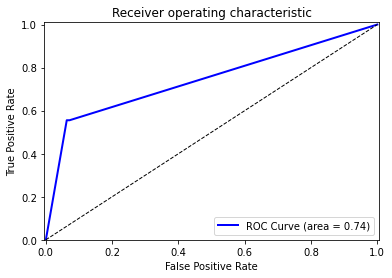

In [105]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='blue', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [97]:
from sklearn import metrics

cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)

print("Confusion matrix:")
print(cm_ANN)


Confusion matrix:
[[1285  714]
 [ 554 1407]]


# ROC Curve Comparisons:

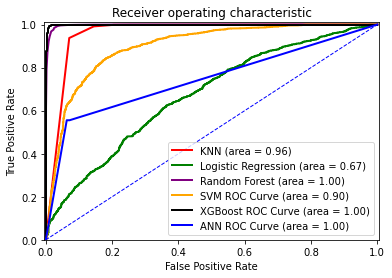

In [109]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

plt.figure()

# Roc Curve1:
plt.plot(fpr_KNN, tpr_KNN, color='red', lw=2, 
         label='KNN (area = %0.2f)' % AUC)

# Roc Curve2:
plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='Logistic Regression (area = %0.2f)' % AUC2)

# Roc Curve3:
plt.plot(fpr3, tpr3, color='purple', lw=2, 
         label='Random Forest (area = %0.2f)' % AUC3)

# Roc Curve for SVM:
plt.plot(fpr_SVM, tpr_SVM, color='orange', lw=2, 
         label='SVM ROC Curve (area = %0.2f)' % AUC_SVM)
# Roc Curve for XGBoost:
plt.plot(fpr_XGBoost, tpr_XGBoost, color='black', lw=2, 
         label='XGBoost ROC Curve (area = %0.2f)' % AUC_XGBoost)
# Roc Curve for ANN:
plt.plot(fpr, tpr, color='blue', lw=2, 
         label='ANN ROC Curve (area = %0.2f)' % AUC_XGBoost)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
    
# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()